In [16]:
from MAD import *
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
med,MAD=1,.9999
Y=weibull_min(c=1,scale=1,loc=0).rvs(1000)
m_Y,s_Y=medMAD(Y)
Weibull2=(Y - m_Y) / s_Y * MAD + med
print(medMAD(Weibull2),np.min(Weibull2))

(1.0, 0.9999) -0.37339918839473185


In [296]:
mmad1=1.1664671180798947
x=1.1664671199199845

np.round(x,8)>np.round(mmad1,8)

False

6.053128029897336 4.4509804938088635 1.5 6.34375971


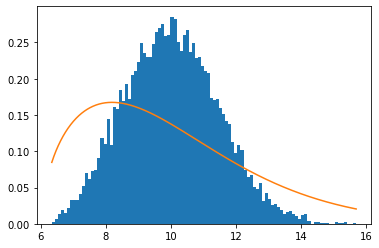

In [380]:
loc,scale,shape=0,10,3
N=10000
Y = weibull_min(c=shape,scale=scale,loc=loc).rvs(N)
m_Y,s_Y=medMAD(Y)
med,MAD=10,1
Y2=np.round((Y - m_Y) / s_Y * MAD + med, 8)
loc2=(loc- m_Y) / s_Y * MAD + med
scale2=scale*MAD/s_Y
shape2=1.5
plt.hist(Y2,bins=100,density=True);
x=np.linspace(np.min(Y2),np.max(Y2),1000)
plt.plot(x,weibull_min(c=shape2,scale=scale2,loc=loc2).pdf(x))
print(loc2,scale2,shape2,np.min(Y2))

In [399]:
N=1001
T=50000

X = weibull_min(c=1.5,scale=10,loc=0).rvs(N)
med,MAD=medMAD(X)

test=Gibbs_med_MAD(T,N,med,MAD,"translated_weibull","normal","gamma","gamma",
                   std_prop_loc=.01,std_prop_scale=0.5,std_prop_shape=0.05,
                   par_prior_loc=[0,10],par_prior_scale=[2,1],par_prior_shape=[2,1],
                   List_X=True)

[0.6415259636071617, 9.23628323167713, 1.5]


  0%|          | 75/50000 [00:00<03:23, 245.85it/s]/Users/antoineluciano/Documents/Recherche/Unsufficient-Gibbs/postertior_sample.py:47: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(weibull_min.pdf(x, c=shape, scale=scale, loc=loc)))
/Users/antoineluciano/Documents/Recherche/Unsufficient-Gibbs/postertior_sample.py:126: RuntimeWarning: invalid value encountered in double_scalars
  1,
/Users/antoineluciano/Documents/Recherche/Unsufficient-Gibbs/postertior_sample.py:164: RuntimeWarning: invalid value encountered in double_scalars
  ),
100%|██████████| 50000/50000 [02:55<00:00, 284.98it/s]


Acceptation rates MH : loc = 39.11% scale = 17.88% shape = 25.84% 


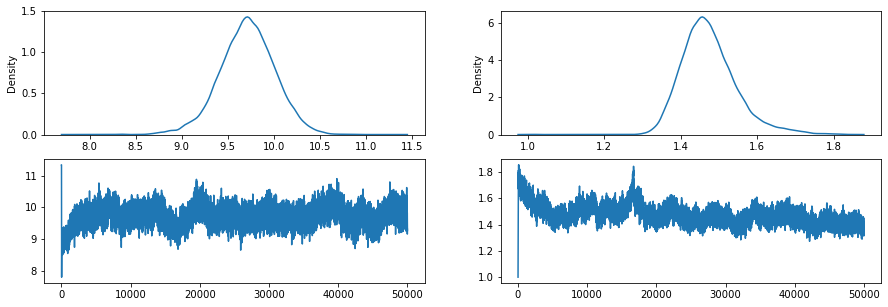

In [398]:
f,ax=plt.subplots(2,2,figsize=(15,5))

sns.kdeplot(test["chains"]["scale"],ax=ax[0,0])
ax[1,0].plot(test["chains"]["scale"])

sns.kdeplot(test["chains"]['shape'],ax=ax[0,1])
ax[1,1].plot(test["chains"]["shape"])

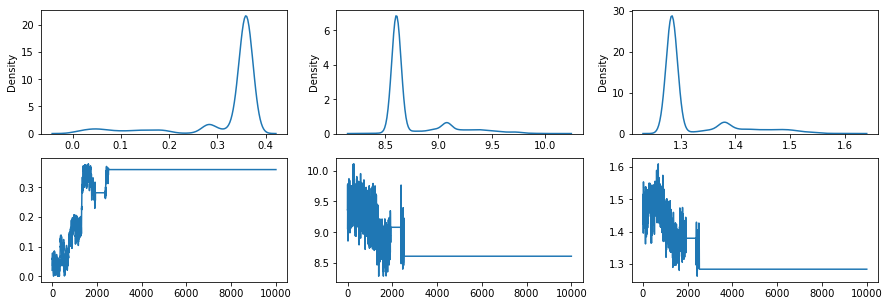

In [393]:
f,ax=plt.subplots(2,3,figsize=(15,5))

sns.kdeplot(test["chains"]["loc"],ax=ax[0,0])
ax[1,0].plot(test["chains"]["loc"])

sns.kdeplot(test["chains"]['scale'],ax=ax[0,1])
ax[1,1].plot(test["chains"]["scale"])

sns.kdeplot(test["chains"]['shape'],ax=ax[0,2])
ax[1,2].plot(test["chains"]["shape"])

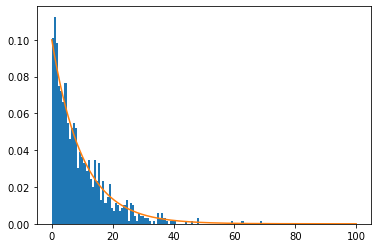

In [256]:

X = weibull_min(c=1,scale=10,loc=0).rvs(N)
plt.hist(X,bins=100,density=True);
x=np.linspace(0,100,1000)
plt.plot(x,weibull_min(c=1,scale=10,loc=0).pdf(x))

[]

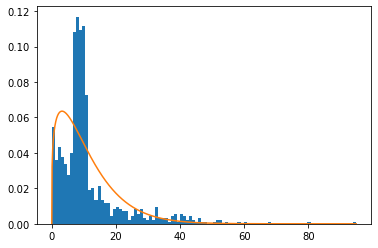

In [264]:
plt.hist(test["X"][-1],bins=100,density=True);
x=np.linspace(0,np.max(test["X"][-1]),1000)
plt.plot(x,weibull_min(c=np.mean(test["chains"][1]),scale=np.mean(test["chains"][0])).pdf(x))
plt.plot()

<AxesSubplot:ylabel='Density'>

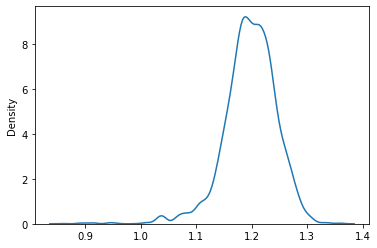

In [221]:
sns.kdeplot(test["chains"][0])